# Echantillon de données

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.read_excel('tg_c.xlsx')
df = pd.read_excel('tg_c.xlsx')

In [67]:
df.head()

,PC,DV,VR,TV,PE
0,712.995789,231.413406,3002.122314,452.617828,55.856407
1,713.796997,230.703949,3001.251221,452.889404,54.910316
2,711.194092,230.742188,3001.751465,452.796936,55.240372
3,710.792725,230.413254,3000.750000,452.700378,54.275158
4,715.920410,230.749146,3001.125244,452.089355,53.776802


In [68]:
df.columns

Index(['PC', 'DV', 'VR', 'TV', 'PE'], dtype='object')

In [27]:
#sns.pairplot(df, x_vars=['PC (mmH2O)', 'DV (t/h)', 'VR (tr/min)', 'TV (°C)'], 
            # y_vars='PE (MW)', height=4, aspect=1, kind='scatter')
#plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC      63 non-null     float64
 1   DV      63 non-null     float64
 2   VR      63 non-null     float64
 3   TV      63 non-null     float64
 4   PE      63 non-null     float64
dtypes: float64(5)
memory usage: 2.6 KB


In [31]:
# Définir X et y

In [71]:
X = df.drop(['PE'], axis=1).values
y = df['PE'].values

In [75]:
print(X)

[[ 712.99578857  231.41340637 3002.12231445  452.61782837]
 [ 713.79699707  230.70394897 3001.2512207   452.8894043 ]
 [ 711.1940918   230.7421875  3001.75146484  452.79693604]
 [ 710.79272461  230.41325378 3000.75        452.70037842]
 [ 715.92041016  230.74914551 3001.12524414  452.08935547]
 [ 713.74963379  230.19917297 3000.75        452.13458252]
 [ 711.51873779  230.54776001 3001.375       451.95336914]
 [ 708.50567627  230.47200012 3000.359375    451.80194092]
 [ 710.00183105  230.50274658 3000.75        452.41052246]
 [ 711.02642822  230.69650269 2998.62597656  452.77746582]
 [ 710.30755615  230.24345398 3000.64648438  452.83740234]
 [ 713.29705811  230.11851501 3001.1875      453.05230713]
 [ 715.64660645  229.98126221 3000.85913086  452.81097412]
 [ 712.02172852  230.63545227 3001.5625      452.88323975]
 [ 711.80444336  230.34483337 3000.09106445  452.77142334]
 [ 711.25097656  230.69969177 3000.625       452.84338379]
 [ 712.69219971  230.56204224 3002.36767578  452.6717834

In [76]:
print(y)

[55.85640717 54.91031647 55.2403717  54.27515793 53.77680206 53.39181519
 51.22193909 53.84312439 53.30871582 54.09349823 55.44687653 55.33704376
 54.79034805 54.97649765 55.41254044 57.13894653 54.31467438 54.49584198
 53.68778229 54.03384781 44.77419281 50.19067764 54.49966812 54.83417511
 53.73894501 54.09111023 54.7301178  54.17710876 53.30960083 54.72280884
 55.18909454 55.36248016 54.68344879 55.70093536 56.04068756 56.09103775
 54.74753189 55.34677505 57.48080826 55.34302139 55.34926224 55.93797302
 55.37801361 56.53857422 56.02241135 56.14447021 56.65139771 55.83308411
 56.66606903 55.23657608 55.83475876 55.69279099 55.73709488 56.13969803
 56.37654495 56.0087738  55.34331894 56.41753006 55.76950836 56.24246979
 54.91791534 55.18764877 55.21864319]


In [78]:
# Split the dataset in training set and test set

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [82]:
# Train the model on training set

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [86]:
# Predict the test set results

In [135]:
y_pred = model.predict(X_test)
print(y_pred)

[51.18032282 55.22443365 55.78016098 54.54631797 53.56971615 55.18702336
 52.08329062]


In [123]:
model.predict([[712.995789, 231.413406, 3002.122314, 452.617828]])

array([56.49534777])

In [91]:
# Evaluate the model

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.45107539258301454

In [94]:
# Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

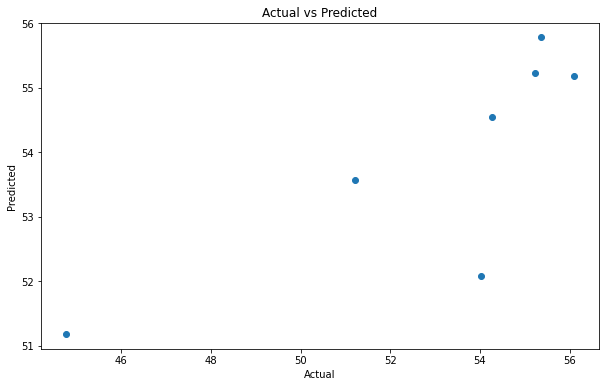

In [143]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [97]:
# Predicted values

In [144]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,44.774193,51.180323,-6.406130
1,55.240372,55.224434,0.015938
2,55.362480,55.780161,-0.417681
3,54.275158,54.546318,-0.271160
4,51.221939,53.569716,-2.347777
5,56.091038,55.187023,0.904014
6,54.033848,52.083291,1.950557
